In [143]:
import nltk #importing all the necessary packages
nltk.download('punkt')
import pandas as pd
import numpy as np
import io
import string
string.punctuation
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
lm = nltk.stem.wordnet.WordNetLemmatizer()
ps=nltk.stem.porter.PorterStemmer()
from nltk.tokenize import word_tokenize
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [144]:
attributes=['result','comments']#naming the columns and reading the training data file
dft = pd.read_csv('/content/1661892619_92027_train_file.csv',names=attributes)


In [145]:
def stemmer(txt):#stemming function
  stem = [ps.stem(word) for word in txt]
  return stem

In [146]:
def lemmatization(txt):#lemmatization function
  lemma = [lm.lemmatize(word) for word in txt]
  return lemma


result
-1    9000
 1    9000
dtype: int64


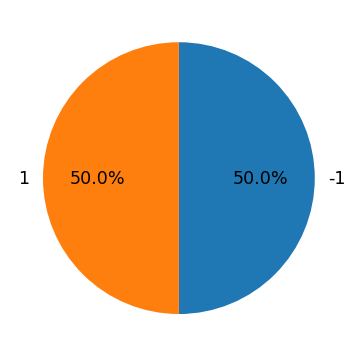

In [147]:
import matplotlib.pyplot as plt
train_tot_count = dft.groupby(['result']).size()#counting and plotting the number of positive, negative values in training dataset
print(train_tot_count)
figs = plt.figure(figsize=(5,5), dpi=90)
axes = plt.subplot(111)
train_tot_count.plot.pie(ax=axes, autopct='%1.1f%%', startangle=270, fontsize=14, label="")



In [148]:
def prepocessing_of_text(dft):#function to perform text processing
  dft["comments"]=dft["comments"].replace(r'[0-9]','',regex=True)
  dft["comments"]=dft["comments"].replace(r'[^\w\s]','',regex=True)
  dft["comments"]=dft["comments"].apply(word_tokenize)
  dft['comments']=dft['comments'].apply(lambda x: stemmer(x))
  dft['comments']=dft['comments'].apply(lambda x:lemmatization(x))
 
  
  stop=set(stopwords.words('english'))
  removed_stopwords=dft["comments"].apply(lambda x: ' '.join([it for it in x if it not in stop]))
  return removed_stopwords #returning after text processing 



In [149]:
from itertools import count#using count vectorization
from sklearn.feature_extraction.text import CountVectorizer
def make_vectors(content):
  count_vect = CountVectorizer(max_features=8,ngram_range=(1,2))#choosing to take 8 common words
  X_train_counts = count_vect.fit_transform(content)
  return X_train_counts.toarray()



In [150]:
def preprocess_of_raw_text(dft):
  content_t =prepocessing_of_text(dft)
  vectors_t = make_vectors(content_t)
  return vectors_t


In [151]:

def DistanceCalculation(a, b):#calculating the Euclidean distance
    return np.sqrt(np.sum((a - b) ** 2))

class KNN_Algorithm_Classifier:
    def __init__(self, k=153):
        self.k = k

    def fit(self, X, y):
        self.X_training_variable = X
        self.y_training_varaiable = y

    def predictor(self, X):
        predicting_for_y = [self.computing_function(x) for x in X]
        return np.array(predicting_for_y)

    def computing_function(self, x):
        
        distances = [DistanceCalculation(x, training_X) for training_X in self.X_training_variable ] # Calculating the distance between testing data point and its neighbours
        index_of_k = np.argsort(distances)[: self.k]#sorting according to values in distance calculation and storing them
       
        Kn_Labels = [self.y_training_varaiable[i] for i in index_of_k]#taking the features of k nearest neighbour
        most_common = Counter(Kn_Labels).most_common(1)
        return most_common[0][0] #returning the most commonly used values
        


In [152]:
trainingvect = preprocess_of_raw_text(dft)

In [153]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(7)
def main(vectors):
  k=153
  n = KNN_Algorithm_Classifier(k=k)#calling the KNN algorithm
  n.fit(vectors,dft["result"])
  return n


In [154]:
n = main(trainingvect[:])

In [155]:
attributes=['comments']#naming the testing data that contains set of reviews and reading the testing data
test_dft = pd.read_csv('/content/1661892619_9579706_test_file.csv',names=attributes)



In [156]:
testingvect= preprocess_of_raw_text(test_dft)


In [157]:
answers = n.predictor(testingvect[:])#Performing the KNN algorithm for testing data
print(answers)
np.savetxt('format.txt', answers, delimiter=',')#Saving the predictions of testing data


[-1  1  1 ... -1  1  1]


-1    9266
 1    8734
dtype: int64


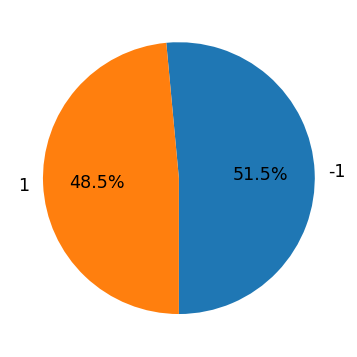

In [159]:
dftr=pd.DataFrame(answers)#saving in pandas dataframe
total_count = dftr.groupby([answers]).size()#counting the number of positive negative reviews
print(total_count)
figs = plt.figure(figsize=(5,5), dpi=90)
axes = plt.subplot(111)
total_count.plot.pie(ax=axes, autopct='%1.1f%%', startangle=270, fontsize=14, label="")#getting the percentage of number of positive and negative reviews
